This notebook demonstrates how to plot a state vector on a Bloch Sphere using the Qiskit library from IBM.

We've defined a few helper functions to convert between probability amplitudes and (theta,phi) on the Bloch sphere. We also define a function to remove global phase from our qubit. And lastly, we define a function to compute the x,y,z coordinates of the bloch vector, the vector on the bloch sphere representing our qubit.

The rotation matrices are defined next and we see what effect they have when they multiply our state by visualising the outcome on the Bloch sphere.

In [1]:
#Importing the matrix exponentiation function
from scipy.linalg import expm
#Importing constants
import scipy.constants as const
#Numpy
import numpy as np
#Plotting
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from qiskit.visualization import plot_bloch_vector

In [2]:
# Some helper functions

# Remove global phase from a given pair of probability amplitudes
# The function does not check if normalised
# Returns: a list of alpha and beta with global phase removed
def remove_global_phase(alpha, beta):
  # Let's find the phase of alpha and multiply alpha and beta by the conjugate to remove it
  # After removing global phase we take only the real part as the imag part of alpha is numerical noise
  phase_alpha = np.angle(complex(alpha))
  alpha = np.real(alpha*np.exp(-1j*phase_alpha))
  beta  = beta*np.exp(-1j*phase_alpha)

  return [alpha, beta]

def check_normalised(alpha, beta):
  prob_alpha = np.abs(alpha)**2
  prob_beta  = np.abs(beta)**2
  prob_sum   = prob_alpha + prob_beta

  return np.isclose(prob_sum, 1)

def angles_to_amplitudes(theta, phi):

  alpha = np.cos(theta/2)
  beta  = np.sin(theta/2)*np.exp(1j*phi)
  return [alpha, beta]

def amplitudes_to_angles(alpha, beta):
  # Remove global phase
  amplitudes = remove_global_phase(alpha, beta)

  theta = 2*np.arccos(alpha)
  phi   = np.angle(beta)

  return [theta, phi]

# Return the bloch vector for plotting on the bloch sphere
# Specify as type 'amplitudes' [alpha, beta] or 'angles' [theta, phi]
def find_bloch_vector(state_values, coeff_type='amplitudes'):

  # I flatten the input list if given as a column vector
  # We represent column vectors as a list of lists in numpy arrays for matrix-vector multiplication
  # The length of the shape of [1, 2, 3] is 1, the length of the shape [[1],[2],[3]] is 2
  if len(np.shape(state_values)) > 1:
    state_values = list(np.concatenate(state_values).flat)

  if(coeff_type == 'amplitudes'):
    amplitudes = remove_global_phase(state_values[0], state_values[1])
    angles     = amplitudes_to_angles(amplitudes[0], amplitudes[1]) #angles [theta, phi]
    # These are the projections from a 3D spherical coodinates vector to x,y,z coordinates
    bloch_x = np.sin(angles[0])*np.cos(angles[1])
    bloch_y = np.sin(angles[0])*np.sin(angles[1])
    bloch_z = np.cos(angles[0])
  elif(coeff_type == 'angles'):
    angles = state_values
    # These are the projections from a 3D spherical coodinates vector to x,y,z coordinates
    bloch_x = np.sin(angles[0])*np.cos(angles[1])
    bloch_y = np.sin(angles[0])*np.sin(angles[1])
    bloch_z = np.cos(angles[0])

  return [bloch_x, bloch_y, bloch_z]

print("Remove global phase from state: " + str(remove_global_phase((4*1j/5), -(3/5))))
print("Is the state normalised? " + str(check_normalised((4*1j/5), -(3/5))))
print("Angles (pi/2, pi) to Amplitudes: " + str(angles_to_amplitudes(np.pi/2, np.pi)))
print("Amplitudes (1/sqrt(2), -1/sqrt(2)) to angles: " + str(amplitudes_to_angles(1/np.sqrt(2), -1/np.sqrt(2))))
print("Bloch vector of (pi/2, pi): " + str(find_bloch_vector([np.pi/2, np.pi/2], coeff_type = 'angles')))
print("Bloch vector of (1/sqrt(2), 1/sqrt(2)): " + str(find_bloch_vector([1/np.sqrt(2), 1/np.sqrt(2)], coeff_type = 'amplitudes')))

Remove global phase from state: [0.8, (-3.6739403974420595e-17+0.6j)]
Is the state normalised? True
Angles (pi/2, pi) to Amplitudes: [0.7071067811865476, (-0.7071067811865475+8.659560562354932e-17j)]
Amplitudes (1/sqrt(2), -1/sqrt(2)) to angles: [1.5707963267948968, 3.141592653589793]
Bloch vector of (pi/2, pi): [6.123233995736766e-17, 1.0, 6.123233995736766e-17]
Bloch vector of (1/sqrt(2), 1/sqrt(2)): [1.0, 0.0, -1.6081226496766364e-16]


In [3]:
# Let's define the Pauli Matrices
sigma_x = np.array([[0, 1],[1, 0]])
sigma_y = np.array([[0 , -1j],[1j, 0]])
sigma_z = np.array([[1, 0],[0, -1]])

# Now let's define the rotation matrices in terms of the Pauli matrices as done in lecture
rotation_x = lambda theta : expm(-1j*(theta/2)*sigma_x)
rotation_y = lambda theta : expm(-1j*(theta/2)*sigma_y)
rotation_z = lambda theta : expm(-1j*(theta/2)*sigma_z)

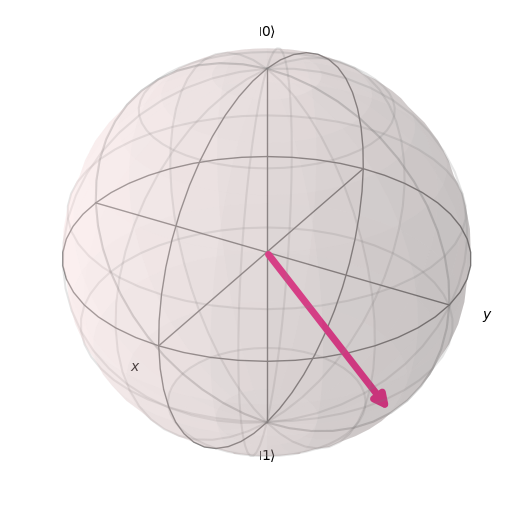

In [4]:
# How do we visualise our state on the Bloch sphere?

# We use the find_bloch_vector() function and pass its output to the plot_bloch_vector() function from Qiskit
test_state  = [3*np.pi/4, np.pi/2] # Theta = 3*pi/4 Phi = pi/2
test_bloch_vector = find_bloch_vector(test_state, coeff_type = 'angles')
plot_bloch_vector(test_bloch_vector, coord_type='cartesian')

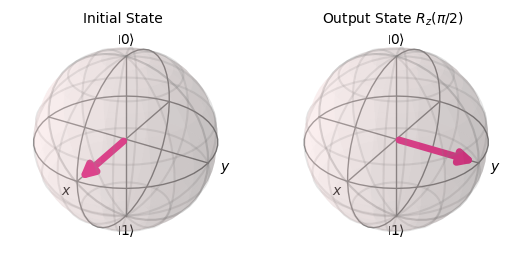

In [5]:
# Z Rotation

# Plot Bloch spheres before and after rotation matrix is applied
# A Z rotation of pi/2 is applied to the state (1/sqrt(2), 1/sqrt(2)) given in terms of probability amplitudes

fig = plt.figure()

initial_state = np.array([[1/np.sqrt(2)],[1/np.sqrt(2)]])

initial_state_bloch_vector = find_bloch_vector(initial_state, coeff_type='amplitudes')
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
plot_bloch_vector(initial_state_bloch_vector, title = 'Initial State', ax = ax1, coord_type='cartesian')

output_state = rotation_z(np.pi/2)@initial_state

output_state_bloch_vector = find_bloch_vector(output_state, coeff_type='amplitudes')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
plot_bloch_vector(output_state_bloch_vector, title = r"Output State $R_z(\pi/2)$" ,ax = ax2, coord_type='cartesian')


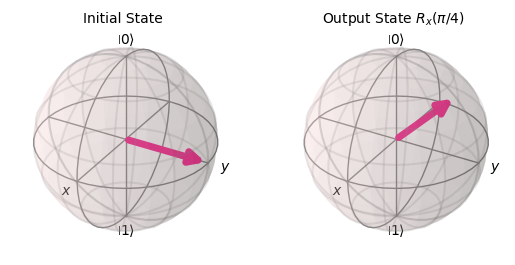

In [6]:
# X Rotation

# Plot Bloch spheres before and after rotation matrix is applied
# An X rotation of pi/4 is applied to the state (1/sqrt(2), i/sqrt(2)) given in terms of probability amplitudes

fig = plt.figure()

initial_state = np.array([[1/np.sqrt(2)],[1j/np.sqrt(2)]])

initial_state_bloch_vector = find_bloch_vector(initial_state, coeff_type='amplitudes')
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
plot_bloch_vector(initial_state_bloch_vector, title = 'Initial State', ax = ax1, coord_type='cartesian')

output_state = rotation_x(np.pi/4)@initial_state

output_state_bloch_vector = find_bloch_vector(output_state, coeff_type='amplitudes')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
plot_bloch_vector(output_state_bloch_vector, title = r"Output State $R_x(\pi/4)$" ,ax = ax2, coord_type='cartesian')

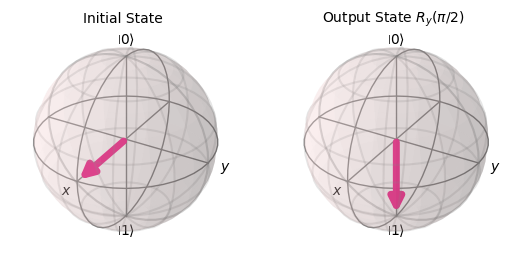

In [7]:
# Y Rotation

# Plot Bloch spheres before and after rotation matrix is applied
# A Y rotation of pi/2 is applied to the state (1/sqrt(2), 1/sqrt(2)) given in terms of probability amplitudes

fig = plt.figure()

initial_state = np.array([[1/np.sqrt(2)],[1/np.sqrt(2)]])

initial_state_bloch_vector = find_bloch_vector(initial_state, coeff_type='amplitudes')
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
plot_bloch_vector(initial_state_bloch_vector, title = 'Initial State', ax = ax1, coord_type='cartesian')

output_state = rotation_y(np.pi/2)@initial_state

output_state_bloch_vector = find_bloch_vector(output_state, coeff_type='amplitudes')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
plot_bloch_vector(output_state_bloch_vector, title = r"Output State $R_y(\pi/2)$" ,ax = ax2, coord_type='cartesian')

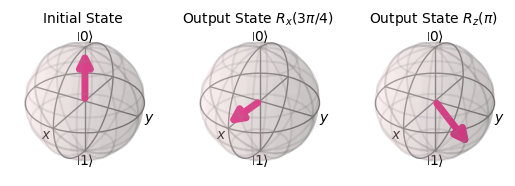

In [8]:
# X and Z Rotation

# Plot Bloch spheres before and after rotation matrices are applied
# An X rotation of 3*pi/4 is applied to the state (1, 0), followed by a Z rotation of pi.
# The initial state is given in terms of probability amplitudes

fig = plt.figure()

initial_state = np.array([[1],[0]])

initial_state_bloch_vector = find_bloch_vector(initial_state, coeff_type='amplitudes')
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
plot_bloch_vector(initial_state_bloch_vector, title = 'Initial State', ax = ax1, coord_type='cartesian')

output_state = rotation_x(3*np.pi/4)@initial_state

output_state_bloch_vector = find_bloch_vector(output_state, coeff_type='amplitudes')
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
plot_bloch_vector(output_state_bloch_vector, title = r"Output State $R_x(3\pi/4)$" ,ax = ax2, coord_type='cartesian')

output_state = rotation_z(np.pi)@output_state

output_state_bloch_vector = find_bloch_vector(output_state, coeff_type='amplitudes')
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
plot_bloch_vector(output_state_bloch_vector, title = r"Output State $R_z(\pi)$" ,ax = ax3, coord_type='cartesian')